# EG01-EG23 Transition Scenario 

** This transition is created using tools from arfc/cyclus_input_gen. **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cyclus_input_gen.demand_deploy as dd
import parser

** Details about the Transition **

Simulation 
- 252 year simulation (1959 to 2211) 
- 1% annual growth in nuclear energy
- Transition from LWR to FR begins at 2115 

LWR 
- 80 year lifetime 
- 1000MWe Capacity 

FR 
- 80 year lifetime 
- 400MWe Capacity 

In [2]:
# 252 Year Simulation
timesteps = 3024
demand_eq = 60 

In [3]:
prev_power_dict = {'instA': np.zeros(timesteps)}

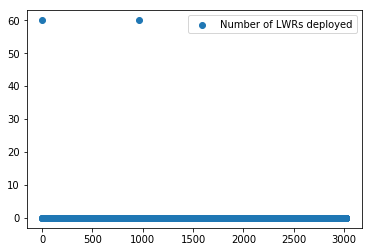

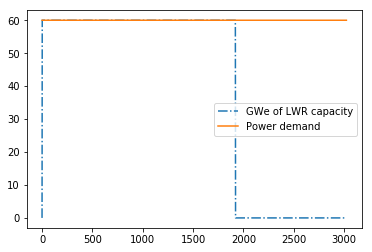

In [4]:
# first, the lwr deployment
lwr_deploy_array, lwr_deploy_power = dd.get_new_deployment(power_dict=prev_power_dict,
                                                           inst_list=['instA'],
                                                           demand_eq= str(demand_eq),
                                                           new_reactor_power=1,
                                                           new_reactor_lifetime=960,
                                                           avail_timestep=1872,
                                                           new=False)

time = np.arange(0, timesteps)

plt.scatter(time, lwr_deploy_array, label='Number of LWRs deployed')
plt.legend()
plt.show()

plt.plot(lwr_deploy_power, label='GWe of LWR capacity',linestyle = '-.')
power_demand = 60+time*0
plt.plot(power_demand, label='Power demand')
plt.legend()
plt.show()

In [5]:
prev_power_dict['lwr'] = lwr_deploy_power

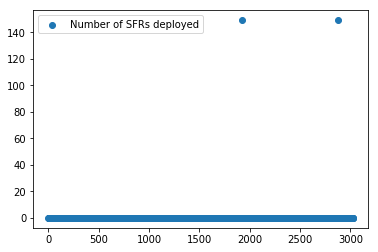

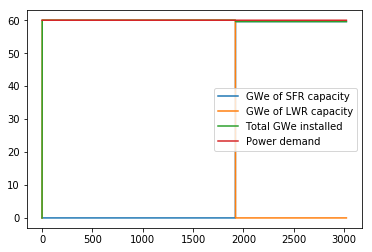

In [6]:
# sfr deployment 
sfr_deploy_array, sfr_deploy_power = dd.get_new_deployment(power_dict=prev_power_dict,
                                                           inst_list=['instA', 'lwr'],
                                                           demand_eq= str(demand_eq),
                                                           new_reactor_power=0.4,
                                                           new_reactor_lifetime=960,
                                                           avail_timestep=1872,
                                                           new=True)

time = np.arange(0, timesteps)
plt.scatter(time, sfr_deploy_array, label='Number of SFRs deployed')
plt.legend()
plt.show()

plt.plot(sfr_deploy_power, label='GWe of SFR capacity')
plt.plot(lwr_deploy_power, label='GWe of LWR capacity')
plt.plot(sfr_deploy_power + lwr_deploy_power, label='Total GWe installed')
power_demand = 60+time*0
plt.plot(power_demand, label='Power demand')
plt.legend()
plt.show()